Best ARMA Order: (0, 0, 0) with AIC: 3065.6389244346633
                               SARIMAX Results                                
Dep. Variable:                    HYB   No. Observations:                  292
Model:                          ARIMA   Log Likelihood               -1530.819
Date:                Mon, 07 Oct 2024   AIC                           3065.639
Time:                        10:03:40   BIC                           3072.992
Sample:                             0   HQIC                          3068.584
                                - 292                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4384      4.019      2.349      0.019       1.562      17.315
sigma2      2095.4949     61.000     34.352      0.000    1975.937    2215.

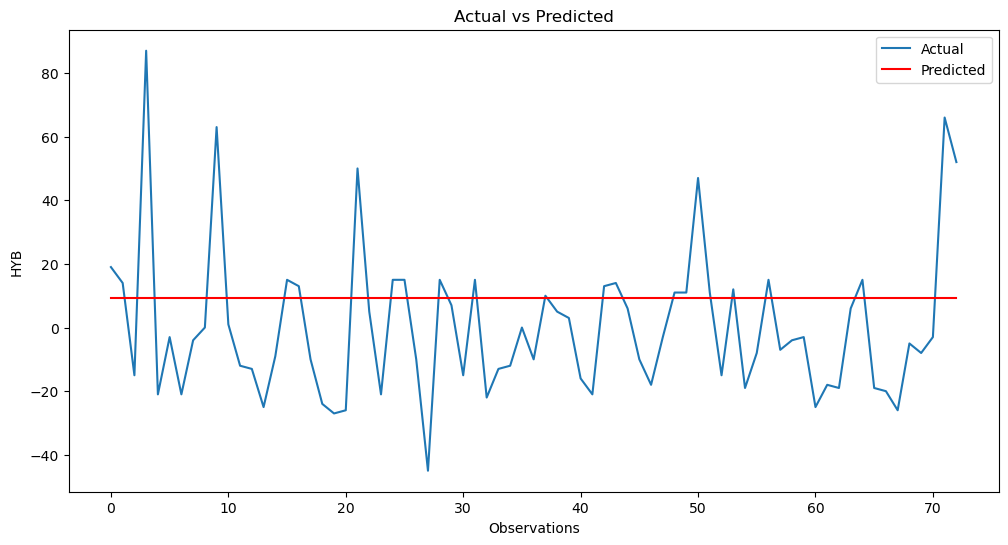

Mean Squared Error (MSE): 626.9830165771309
Root Mean Squared Error (RMSE): 25.039628922512627
R-squared (R²): -0.16227357506704343
Mean Absolute Percentage Error (MAPE): inf%


In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import itertools
import warnings

warnings.filterwarnings("ignore")

# Load your data
data = pd.read_csv('new_data2.csv')
data = data.drop(['date(dd/mm/yy)'], axis=1)

# Handle missing values
data.fillna(data.mean(), inplace=True)

# Define the target variable
target = 'HYB'  # Replace with your actual target variable

# Train-test split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Function to evaluate ARMA model using AIC
def evaluate_arma_model(data, arima_order):
    try:
        # d=0 makes it an ARMA model
        model = ARIMA(data[target], order=(arima_order[0], 0, arima_order[1]))
        model_fit = model.fit()
        aic = model_fit.aic
        return aic
    except Exception as e:
        print("Error:", e)
        return float("inf")

# Grid search for p and q parameters
p = q = range(0, 3)  # AR and MA orders
orders = list(itertools.product(p, [0], q))  # (p,0,q) for ARMA model

best_aic = float("inf")
best_order = None

for order in orders:
    aic = evaluate_arma_model(train, order)
    if aic < best_aic:
        best_aic = aic
        best_order = order

# Display the best parameters
print(f'Best ARMA Order: {best_order} with AIC: {best_aic}')

# Fit the ARMA model with the best parameters
model = ARIMA(train[target], order=best_order)
model_fit = model.fit()

# Model summary
print(model_fit.summary())

# Predictions
predictions = model_fit.forecast(steps=len(test))

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test[target].values, label='Actual')
plt.plot(predictions.values, label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Observations')
plt.ylabel(target)
plt.legend()
plt.show()

# Evaluation metrics
mse = mean_squared_error(test[target], predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test[target], predictions)
mape = np.mean(np.abs((test[target] - predictions) / test[target])) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


In [2]:
!pip install statsmodels pandas

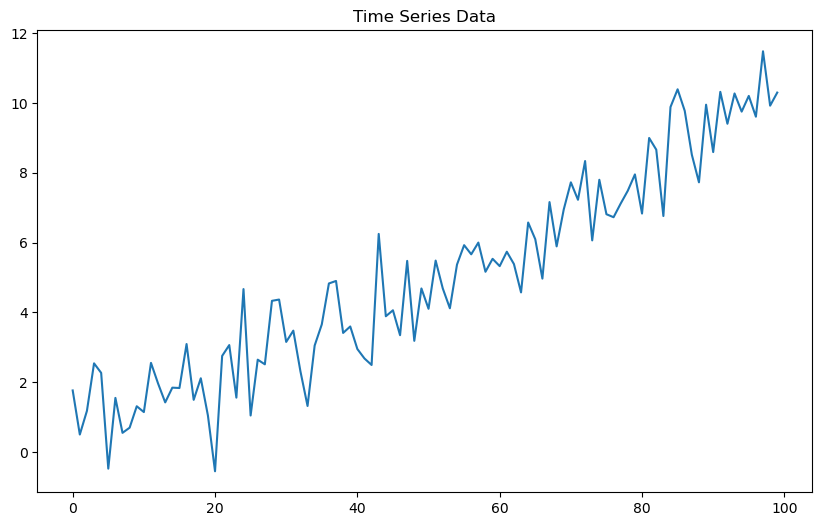

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import matplotlib.pyplot as plt

data = pd.read_csv('new_data2.csv')
data = data.drop(['date(dd/mm/yy)'], axis=1)

# Handle missing values
data.fillna(data.mean(), inplace=True)

# Generate sample time series data
np.random.seed(0)
data = np.random.normal(0, 1, 100) + np.arange(100) * 0.1
time_series = pd.Series(data)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(time_series)
plt.title('Time Series Data')
plt.show()

In [4]:
# Fit the ARMA model
p, q = 2, 2  # You can change these values based on ACF and PACF plots
arma_model = tsa.ARIMA(time_series, order=(p,0, q)).fit()

# Print the summary of the model
print(arma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -151.817
Date:                Mon, 07 Oct 2024   AIC                            315.633
Time:                        10:03:49   BIC                            331.264
Sample:                             0   HQIC                           321.959
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6740      4.199      1.351      0.177      -2.556      13.904
ar.L1          0.6463      1.404      0.460      0.645      -2.106       3.398
ar.L2          0.3491      1.401      0.249      0.8

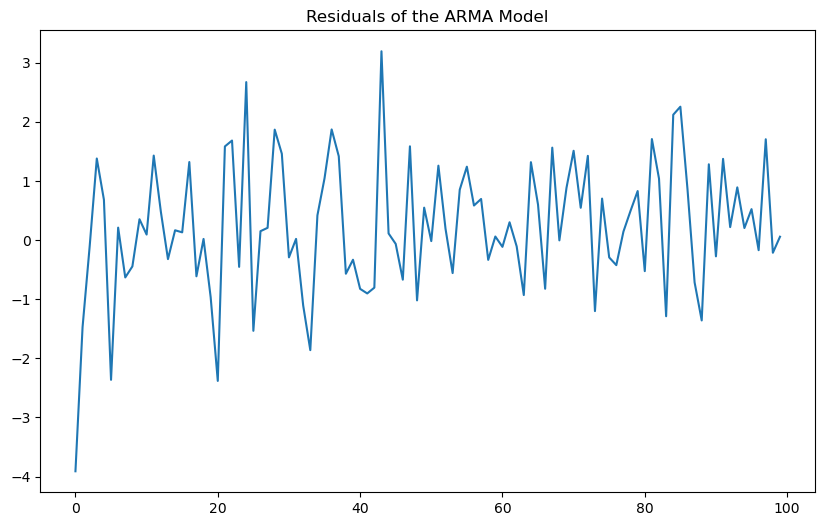

<Figure size 1000x600 with 0 Axes>

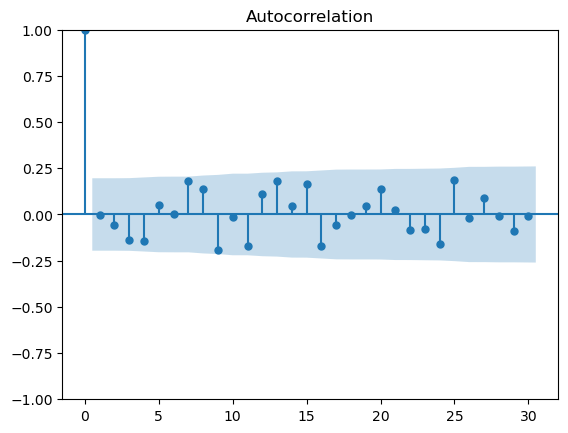

<Figure size 1000x600 with 0 Axes>

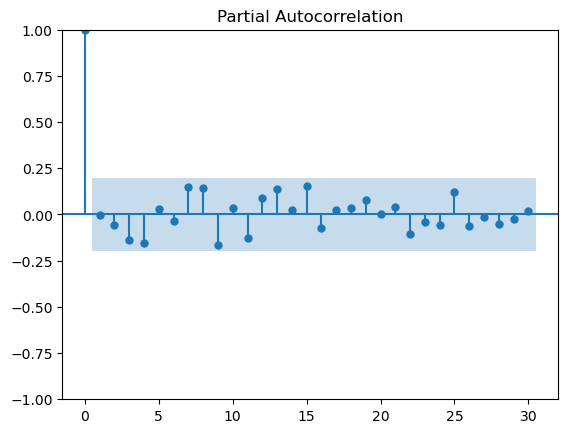

In [5]:
# Plot the residuals
residuals = arma_model.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the ARMA Model')
plt.show()

# Plot the ACF of the residuals
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_acf(residuals, lags=30)
plt.show()
# Plot the PACF of the residuals
plt.figure(figsize=(10, 6))
sm.graphics.tsa.plot_pacf(residuals, lags=30)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

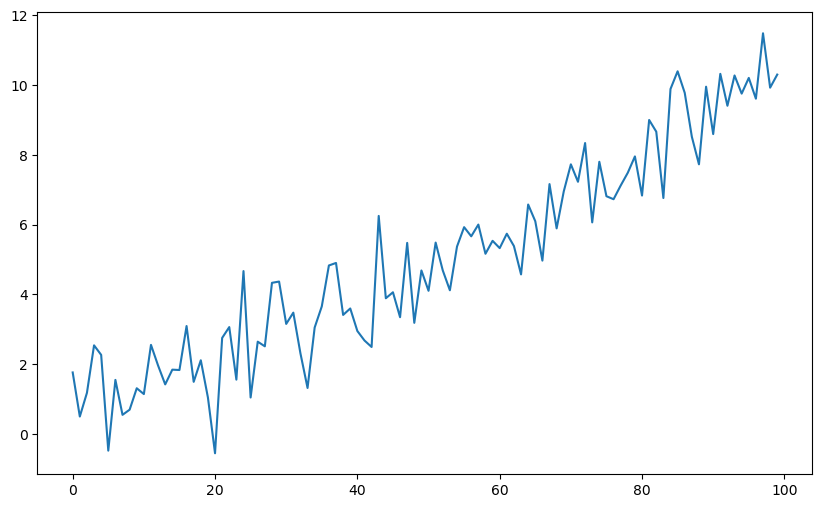

In [9]:
# Forecast future values
forecast_steps = 3
forecast, stderr, conf_int = arma_model.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original')
plt.plot(np.arange(len(time_series), len(time_series) + forecast_steps), forecast, label='Forecast')
plt.fill_between(np.arange(len(time_series), len(time_series) + forecast_steps),
                 conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('ARMA Model Forecast')
plt.legend()
plt.show()